<a href="https://colab.research.google.com/github/WilliamAshbee/computervision/blob/main/homework2/HarrisCornerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#https://muthu.co/harris-corner-detector-implementation-in-python/
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

img = imread('box.jpg')
imggray = rgb2gray(img)

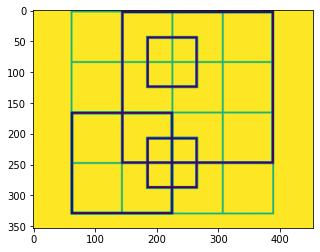

In [54]:
plt.imshow(imggray)
#from google.colab import drive
#drive.mount('/content/drive')

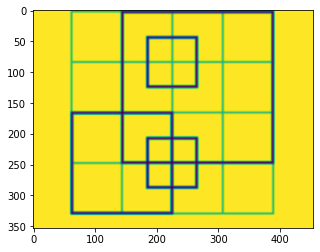

In [55]:
plt.imshow(gaussian_filter(imggray, sigma=1))

In [6]:
from scipy import signal as sig
import numpy as np

def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')

I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [56]:
I_x

array([[-3.,  0.,  0., ...,  0.,  0.,  3.],
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       ...,
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       [-4.,  0.,  0., ...,  0.,  0.,  4.],
       [-3.,  0.,  0., ...,  0.,  0.,  3.]])

In [7]:
from scipy.ndimage import gaussian_filter

Ixx = gaussian_filter(I_x**2, sigma=1)
Ixy = gaussian_filter(I_y*I_x, sigma=1)
Iyy = gaussian_filter(I_y**2, sigma=1)

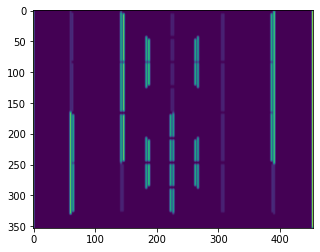

In [57]:
plt.imshow(Ixx)

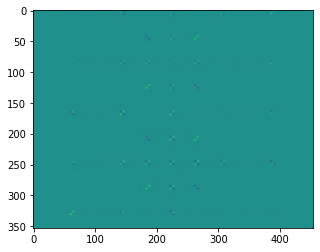

In [58]:
plt.imshow(Ixy)

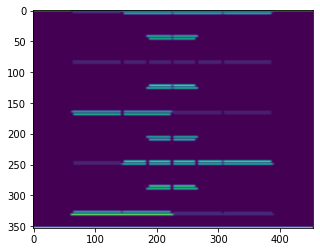

In [59]:
plt.imshow(Iyy)

In [85]:
k = 0.235

# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [86]:
harris_response.shape

(353, 454)

In [87]:
r = None#alternative exists

In [88]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)

for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]


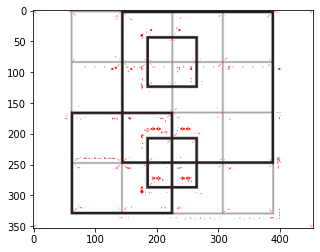

In [89]:
plt.imshow(img_copy_for_corners)

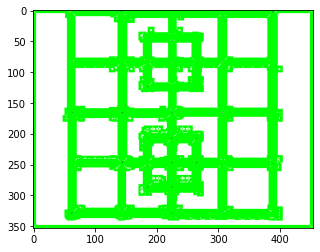

In [90]:
plt.imshow(img_copy_for_edges)

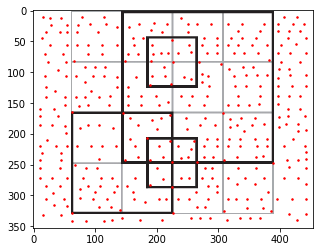

In [91]:
from skimage.feature import corner_peaks
import matplotlib.pyplot as plt

corners = corner_peaks(harris_response,min_distance=10)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)


In [92]:
from skimage.feature import corner_fast, corner_peaks
square = np.zeros((12, 12))
square[3:9, 3:9] = 1
corners = corner_peaks(corner_fast(square, 9), min_distance=1)


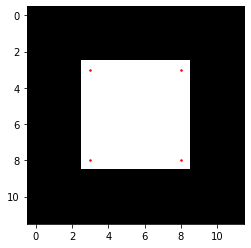

In [15]:
fig, ax = plt.subplots()
ax.imshow(square, interpolation='nearest', cmap=plt.cm.gray)

ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)


In [16]:
plt.show()